**Chowdhury Walid Tahabee**

APAN5210 - Python for Data Analysis

*****04/16/2021*****
# Assignment: NY Taxi Rides

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline

## 1. Upload the data and display data columns, number of rows, variable types, and numeric statistics + categorical variable frequencies 

In [2]:
data_filename = '~/Downloads/data/nyc_data.csv' 

In [3]:
data = pd.read_csv(data_filename, 
                   parse_dates=['pickup_datetime', 'dropoff_datetime'] )

head() method of DataFrames displays the first three lines of the table

In [4]:
data.head()

,medallion,hack_license,vendor_id,rate_code,store_and_fwd_flag,pickup_datetime,dropoff_datetime,passenger_count,trip_time_in_secs,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
0,76942C3205E17D7E7FE5A9F709D16434,25BA06A87905667AA1FE5990E33F0E2E,VTS,1,NaN,2013-01-01 00:00:00,2013-01-01 00:05:00,3,300,0.61,-73.955925,40.781887,-73.963181,40.777832
1,517C6B330DBB3F055D007B07512628B3,2C19FBEE1A6E05612EFE4C958C14BC7F,VTS,1,NaN,2013-01-01 00:05:00,2013-01-01 00:21:00,1,960,3.28,-74.005501,40.745735,-73.964943,40.755722
2,ED15611F168E41B33619C83D900FE266,754AEBD7C80DA17BA1D81D89FB6F4D1D,CMT,1,N,2013-01-01 00:05:52,2013-01-01 00:12:18,1,386,1.50,-73.969955,40.799770,-73.954567,40.787392
3,B33E704CC189E80C9671230C16527BBC,6789C77E1CBDC850C450D72204702976,VTS,1,NaN,2013-01-01 00:06:00,2013-01-01 00:06:00,6,0,0.00,-73.991432,40.755081,-73.991417,40.755085
4,BD5CC6A22D05EB2D5C8235526A2A4276,5E8F2C93B5220A922699FEBAFC2F7A54,VTS,1,NaN,2013-01-01 00:06:00,2013-01-01 00:12:00,2,360,1.31,-73.966225,40.773716,-73.955399,40.782597


In [5]:
len(data) #number of rows

846945

In [6]:
def percentage_nulls(df):

    number_nulls = pd.DataFrame(df.isnull().sum(),columns=['Total'])
    number_nulls['% nulls'] = round((number_nulls['Total'] / df.shape[0])*100,1)
    
    return number_nulls

percentage_nulls(data) # % of nulls for each column

,Total,% nulls
medallion,0,0.0
hack_license,0,0.0
vendor_id,0,0.0
rate_code,0,0.0
store_and_fwd_flag,422368,49.9
pickup_datetime,0,0.0
dropoff_datetime,0,0.0
passenger_count,0,0.0
trip_time_in_secs,0,0.0
trip_distance,0,0.0


In [7]:
data.dtypes #data types

medallion                     object
hack_license                  object
vendor_id                     object
rate_code                      int64
store_and_fwd_flag            object
pickup_datetime       datetime64[ns]
dropoff_datetime      datetime64[ns]
passenger_count                int64
trip_time_in_secs              int64
trip_distance                float64
pickup_longitude             float64
pickup_latitude              float64
dropoff_longitude            float64
dropoff_latitude             float64
dtype: object

In [8]:
data.describe() #numeric statistics

,rate_code,passenger_count,trip_time_in_secs,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
count,846945.000000,846945.000000,8.469450e+05,8.469450e+05,846945.000000,846945.000000,846945.000000,846945.000000
mean,1.026123,1.710272,8.125239e+02,9.958211e+00,-73.975155,40.750490,-73.974197,40.750967
std,0.223480,1.375266,1.609831e+04,6.525205e+03,0.035142,0.027224,0.033453,0.030766
min,0.000000,0.000000,-1.000000e+01,0.000000e+00,-74.098305,40.009911,-74.099998,40.009911
25%,1.000000,1.000000,3.610000e+02,1.050000e+00,-73.992371,40.736031,-73.991570,40.735207
50%,1.000000,1.000000,6.000000e+02,1.800000e+00,-73.982094,40.752975,-73.980614,40.753597
75%,1.000000,2.000000,9.600000e+02,3.200000e+00,-73.968048,40.767460,-73.965157,40.768227
max,6.000000,6.000000,4.294796e+06,6.005123e+06,-73.028473,40.996132,-73.027061,40.998592


Categorical Variable Frequencies

In [9]:
data['vendor_id'].value_counts()

CMT    424678
VTS    422267
Name: vendor_id, dtype: int64

In [10]:
data['store_and_fwd_flag'].value_counts()

N    414599
Y      9978
Name: store_and_fwd_flag, dtype: int64

In [11]:
data['medallion'].value_counts()

20BA941F62CC07F1FA3EF3E122B1E9B2    125
E8260A241D62ECC156ECB8AD607E1E6B    125
22D1934CF861B8BE43F10FBAD93FEF69    121
A0DEAEC3D5592AE94B876356F12F8158    118
D30BED60331C79E3F7ACD05B325ED42F    118
                                   ... 
3A864D245DEB9D45DD4AAF14917324A9      1
A5512F74E5F16CC80F0F9176015AADCA      1
B93670B6F8B3B0276B0A01CCF57A95E7      1
94710A571356D7D2898EA4BBE1560577      1
476657049B62401D5EB59CEF8C6F2FC1      1
Name: medallion, Length: 13446, dtype: int64

In [12]:
data['hack_license'].value_counts()

03173DD93C1171DA1788E6E7D733C5A9    97
23DF80C977D15141F11DD713C523C311    88
51C1BE97280A80EBFA8DAD34E1956CF6    78
3D757E111C78F5CAC83D44A92885D490    78
19B3F3F825E4C1DE13B9D5C0628F5001    77
                                    ..
C7284C480C535EF214A5D530E4A6891C     1
2FBCA25BDD644AA0037E6B09A397CDFE     1
3EF032132E59DA0C14993B91584F5D22     1
1B528B114F49A7CFF32A78C5A77BAF67     1
DD6EE1F7B2A70653AA1C42FC3B9327BF     1
Name: hack_license, Length: 38391, dtype: int64

## 2. Display a scatter plot of pick up locations. For which vendor is it easier to find a cab?

Get the actual coordinates: four DataFrame columns
These four variables are all Series objects:

In [13]:
p_lng = data.pickup_longitude
p_lat = data.pickup_latitude
d_lng = data.dropoff_longitude
d_lat = data.dropoff_latitude

In [14]:
# a Series is an indexed list of values.
p_lng.head()

0   -73.955925
1   -74.005501
2   -73.969955
3   -73.991432
4   -73.966225
Name: pickup_longitude, dtype: float64

In [15]:
# Get the coordinates of points in pixels from geographical coordinates.
def lat_lng_to_pixels(lat, lng):
    lat_rad = lat * np.pi / 180.0
    lat_rad = np.log(np.tan((lat_rad + np.pi / 2.0) / 2.0))
    x = 100 * (lng + 180.0) / 360.0
    y = 100 * (lat_rad - np.pi) / (2.0 * np.pi)
    return (x, y)

In [16]:
# Get pickup coordinates from pickup latitude and longitude
px, py = lat_lng_to_pixels(p_lat, p_lng)
py.head()

0   -37.572749
1   -37.586007
2   -37.566187
3   -37.582580
4   -37.575746
Name: pickup_latitude, dtype: float64

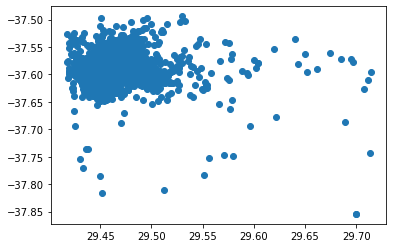

In [17]:
plt.scatter(px, py)

(29.4, 29.55, -37.63, -37.54)

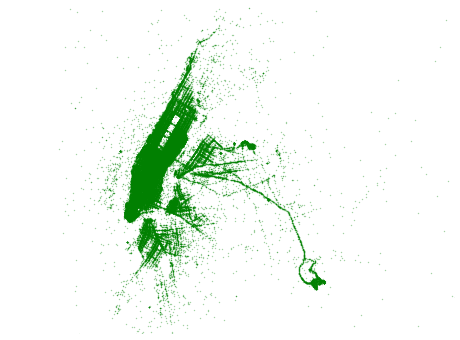

In [20]:
# Specify the figure size
plt.figure(figsize=(8, 6)) 
# s argument is used to make the marker size smaller
# alpha specifies opacity
plt.scatter(px, py, s=.1, alpha=0.5, color = 'green')
# equal aspect ratio
plt.axis('equal')
# zoom in
plt.xlim(29.40, 29.55)
plt.ylim(-37.63, -37.54)
# remove the axes
plt.axis('off')

In [21]:
# For which vendor is it easier to find a cab? 
data[data['trip_distance']!=max(data['trip_distance'])].groupby('vendor_id')['trip_distance'].sum() 
#removed outlier

vendor_id
CMT    1193164.10
VTS    1235769.98
Name: trip_distance, dtype: float64

Since VTS covered more distance according to our dataset, it is likely that it would be easier to find VTS cabs

## 3. Display a histogram of trip distances. What is the most common trip distance?

In [22]:
bin_array = np.linspace(start=0., stop=10., num=100)
bin_array

array([ 0.        ,  0.1010101 ,  0.2020202 ,  0.3030303 ,  0.4040404 ,
        0.50505051,  0.60606061,  0.70707071,  0.80808081,  0.90909091,
        1.01010101,  1.11111111,  1.21212121,  1.31313131,  1.41414141,
        1.51515152,  1.61616162,  1.71717172,  1.81818182,  1.91919192,
        2.02020202,  2.12121212,  2.22222222,  2.32323232,  2.42424242,
        2.52525253,  2.62626263,  2.72727273,  2.82828283,  2.92929293,
        3.03030303,  3.13131313,  3.23232323,  3.33333333,  3.43434343,
        3.53535354,  3.63636364,  3.73737374,  3.83838384,  3.93939394,
        4.04040404,  4.14141414,  4.24242424,  4.34343434,  4.44444444,
        4.54545455,  4.64646465,  4.74747475,  4.84848485,  4.94949495,
        5.05050505,  5.15151515,  5.25252525,  5.35353535,  5.45454545,
        5.55555556,  5.65656566,  5.75757576,  5.85858586,  5.95959596,
        6.06060606,  6.16161616,  6.26262626,  6.36363636,  6.46464646,
        6.56565657,  6.66666667,  6.76767677,  6.86868687,  6.96

<AxesSubplot:>

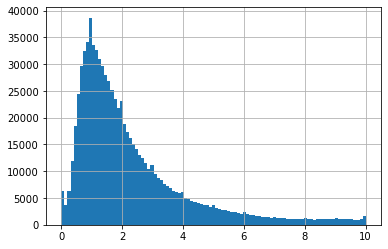

In [23]:
data.trip_distance.hist(bins=bin_array)

In [26]:
import statistics
statistics.mode(data['trip_distance']) # most common trip distance

1.0

In [33]:
data_cleaned = data.loc[data.trip_distance < 100]
data_cleaned.groupby('vendor_id')['pickup'].sum()

vendor_id
CMT    1192375.90
VTS    1235769.98
Name: trip_distance, dtype: float64

## 	4. Display a histogram of the fare total amounts. What can you say about the data?

In [39]:
data_filename_2 = '~/Downloads/data/nyc_fare.csv' 
data_fares = pd.read_csv(data_filename_2)

<AxesSubplot:>

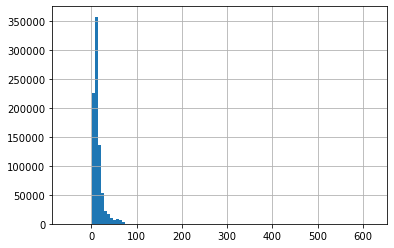

In [40]:
data_fares.total_amount.hist(bins=100)

In [41]:
data_fares['total_amount'].describe()

count    846945.000000
mean         14.587073
std          11.380950
min         -52.500000
25%           8.000000
50%          11.000000
75%          16.500000
max         620.010000
Name: total_amount, dtype: float64

### The distribution has a steep right-skew, and there seems to be some negative values for total fare, which is likely an error in the data pipeline. There are also extreme outliers on the other end, with the max fare being $620, which also seems to be an error. 

<AxesSubplot:>

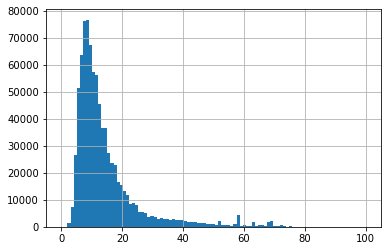

In [42]:
#Cleaned histogram (removing unusual total fare values)
bin_array = np.linspace(start=0., stop=100, num=100)
data_fares.total_amount.hist(bins=bin_array)

Specifying the start and stop point to account for outliers gives us a distribution that closely resembles the right-skewed trip distance histogram, which is unsurprising since fares are probably fairly correlated with trip distance. 

## 5. How many unusually long trips (of greater than 100 miles) do you see?

In [32]:
data[data['trip_distance'] > 100]

,medallion,hack_license,vendor_id,rate_code,store_and_fwd_flag,pickup_datetime,dropoff_datetime,passenger_count,trip_time_in_secs,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
504497,7237EC7ABD6114EDDC87A3AA846F8418,D52502537E2DF62C9BFFECF5A387E7E9,CMT,1,N,2013-08-02 11:22:31,2013-08-02 11:33:03,1,631,6005123.0,-73.997467,40.736397,-73.991882,40.764629
507107,50DA72F510E2F84A42712E13744FAC7B,EA9D03A766C1D32A6668FFF0C1EB4E4B,CMT,1,N,2013-08-04 18:42:17,2013-08-04 20:37:19,3,4290965,181.8,-73.978020,40.765167,-73.815041,40.730076
548988,A978A0AAE9B2CFEE310FACD97A09C319,CE56A27F53ABF411094B6CD708BFBA96,CMT,1,N,2013-08-24 17:03:27,2013-08-24 17:03:29,1,1,442.0,-73.993896,40.702644,-73.993874,40.702637
558665,5A5C516A820FE476E9D3E14101B669AC,C24585AA866FC76A4E09A05F55DC7E54,CMT,2,N,2013-08-29 10:01:40,2013-08-29 11:52:20,1,6640,164.4,-73.791534,40.661026,-73.983734,40.765778


In [36]:
print(len(data[data['trip_distance'] > 100]), 'trips with unusually long trips (of greater than 100 miles)')

4 trips with unusually long trips (of greater than 100 miles)
